### Ref. https://www.drivendata.org/competitions/57/nepal-earthquake/page/136/

### Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import utils
from utils import *
#import dython as dyt
from dython.nominal import theils_u


In [2]:
temp = pd.read_csv('../input/train_values.csv')

In [3]:
temp1 = pd.read_csv('../input/train_labels.csv')

In [4]:
del temp1['building_id']
temp1.head()

,damage_grade
0,3
1,2
2,3
3,2
4,3


In [5]:
temp.tail()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
260596,688636,25,1335,1621,1,55,6,3,n,r,...,0,0,0,0,0,0,0,0,0,0
260597,669485,17,715,2060,2,0,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
260598,602512,17,51,8163,3,55,6,7,t,r,...,0,0,0,0,0,0,0,0,0,0
260599,151409,26,39,1851,2,10,14,6,t,r,...,0,0,0,0,0,0,0,0,0,0
260600,747594,21,9,9101,3,10,7,6,n,r,...,0,0,0,0,0,0,0,0,0,0


In [6]:
train = pd.concat([temp, temp1], axis=1)

In [7]:
train.shape

(260601, 40)

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260601 entries, 0 to 260600
Data columns (total 40 columns):
building_id                               260601 non-null int64
geo_level_1_id                            260601 non-null int64
geo_level_2_id                            260601 non-null int64
geo_level_3_id                            260601 non-null int64
count_floors_pre_eq                       260601 non-null int64
age                                       260601 non-null int64
area_percentage                           260601 non-null int64
height_percentage                         260601 non-null int64
land_surface_condition                    260601 non-null object
foundation_type                           260601 non-null object
roof_type                                 260601 non-null object
ground_floor_type                         260601 non-null object
other_floor_type                          260601 non-null object
position                                  260601 non

In [9]:
test = pd.read_csv('../input/test_values.csv')

In [10]:
test['damage_grade'] = -1

In [11]:
test.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
0,300051,17,596,11307,3,20,7,6,t,r,...,0,0,0,0,0,0,0,0,0,-1
1,99355,6,141,11987,2,25,13,5,t,r,...,0,0,0,0,0,0,0,0,0,-1
2,890251,22,19,10044,2,5,4,5,t,r,...,0,0,0,0,0,0,0,0,0,-1
3,745817,26,39,633,1,0,19,3,t,r,...,0,1,0,0,0,0,0,0,0,-1
4,421793,17,289,7970,3,15,8,7,t,r,...,0,0,0,0,0,0,0,0,0,-1


In [12]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86868 entries, 0 to 86867
Data columns (total 40 columns):
building_id                               86868 non-null int64
geo_level_1_id                            86868 non-null int64
geo_level_2_id                            86868 non-null int64
geo_level_3_id                            86868 non-null int64
count_floors_pre_eq                       86868 non-null int64
age                                       86868 non-null int64
area_percentage                           86868 non-null int64
height_percentage                         86868 non-null int64
land_surface_condition                    86868 non-null object
foundation_type                           86868 non-null object
roof_type                                 86868 non-null object
ground_floor_type                         86868 non-null object
other_floor_type                          86868 non-null object
position                                  86868 non-null object
pla

In [13]:
train_test = train.append(test, ignore_index=True, sort=False)

In [14]:
train_test.shape

(347469, 40)

In [15]:
del temp, temp1

In [16]:
test.shape

(86868, 40)

### Check duplicate rows

In [17]:
train_test.drop_duplicates(inplace=True)

In [18]:
train_test.shape

(347469, 40)

### Check for duplicate columns

In [19]:
dupsCols = getDuplicateColumns(train_test)

In [20]:
dupsCols

[]

In [21]:
train_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 347469 entries, 0 to 347468
Data columns (total 40 columns):
building_id                               347469 non-null int64
geo_level_1_id                            347469 non-null int64
geo_level_2_id                            347469 non-null int64
geo_level_3_id                            347469 non-null int64
count_floors_pre_eq                       347469 non-null int64
age                                       347469 non-null int64
area_percentage                           347469 non-null int64
height_percentage                         347469 non-null int64
land_surface_condition                    347469 non-null object
foundation_type                           347469 non-null object
roof_type                                 347469 non-null object
ground_floor_type                         347469 non-null object
other_floor_type                          347469 non-null object
position                                  347469 non

In [22]:
train_test.describe()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
count,3.474690e+05,347469.000000,347469.000000,347469.000000,347469.000000,347469.000000,347469.000000,347469.000000,347469.000000,347469.000000,...,347469.000000,347469.000000,347469.000000,347469.000000,347469.000000,347469.000000,347469.000000,347469.000000,347469.000000,347469.000000
mean,5.259136e+05,13.897315,701.838052,6258.846760,2.130579,26.538814,8.017014,5.434799,0.088972,0.762077,...,0.033686,0.008136,0.000958,0.000363,0.001053,0.000167,0.000138,0.000078,0.005065,1.428697
std,3.043545e+05,8.032597,412.875674,3646.950564,0.727761,73.527749,4.388646,1.915555,0.284704,0.425813,...,0.180421,0.089832,0.030943,0.019039,0.032438,0.012919,0.011753,0.008815,0.070990,1.498984
min,4.000000e+00,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000
25%,2.619990e+05,7.000000,350.000000,3073.000000,2.000000,10.000000,5.000000,4.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000
50%,5.260710e+05,12.000000,706.000000,6271.000000,2.000000,15.000000,7.000000,5.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,7.895880e+05,21.000000,1050.000000,9414.000000,2.000000,30.000000,9.000000,6.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,1.052934e+06,30.000000,1427.000000,12567.000000,9.000000,995.000000,100.000000,32.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000


In [23]:
train_test['land_surface_condition'].head()

0    t
1    o
2    t
3    t
4    t
Name: land_surface_condition, dtype: object

In [24]:
train_test['damage_grade'].unique()

array([ 3,  2,  1, -1])

In [25]:
type(train_test['damage_grade'])

pandas.core.series.Series

### Ctegorical features correlations

In [26]:
train_cat = train_test.select_dtypes(include=[np.object])

In [27]:
train_cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 347469 entries, 0 to 347468
Data columns (total 8 columns):
land_surface_condition    347469 non-null object
foundation_type           347469 non-null object
roof_type                 347469 non-null object
ground_floor_type         347469 non-null object
other_floor_type          347469 non-null object
position                  347469 non-null object
plan_configuration        347469 non-null object
legal_ownership_status    347469 non-null object
dtypes: object(8)
memory usage: 23.9+ MB


In [28]:
train_cat.describe()

,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,legal_ownership_status
count,347469,347469,347469,347469,347469,347469,347469,347469
unique,3,5,3,5,4,4,10,4
top,t,r,n,f,q,s,d,v
freq,288937,292374,243975,279591,220286,269463,333327,334633


In [29]:
pd.crosstab(train_cat['roof_type'], train_cat['ground_floor_type'])

ground_floor_type,f,m,v,x,z
roof_type,,,,,
n,208399,504,11143,22907,1022
q,70017,89,3282,8228,289
x,1175,111,18306,1974,23


In [30]:
theils_u(train_cat['roof_type'], train_cat['ground_floor_type'])

0.16243788681009713

In [31]:
corr_categories(train_cat)

,Var1,Var2,Corr_Cat
9,foundation_type,ground_floor_type,0.241418
22,ground_floor_type,foundation_type,0.231341
8,foundation_type,roof_type,0.225243
10,foundation_type,other_floor_type,0.218727
24,ground_floor_type,other_floor_type,0.197289
23,ground_floor_type,roof_type,0.188765
15,roof_type,foundation_type,0.185737
17,roof_type,other_floor_type,0.177477
16,roof_type,ground_floor_type,0.162438
29,other_floor_type,foundation_type,0.135036


### Numerical feature Correlations

In [32]:
train_num = train_test.select_dtypes(include=[np.number])

In [33]:
train_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 347469 entries, 0 to 347468
Data columns (total 32 columns):
building_id                               347469 non-null int64
geo_level_1_id                            347469 non-null int64
geo_level_2_id                            347469 non-null int64
geo_level_3_id                            347469 non-null int64
count_floors_pre_eq                       347469 non-null int64
age                                       347469 non-null int64
area_percentage                           347469 non-null int64
height_percentage                         347469 non-null int64
has_superstructure_adobe_mud              347469 non-null int64
has_superstructure_mud_mortar_stone       347469 non-null int64
has_superstructure_stone_flag             347469 non-null int64
has_superstructure_cement_mortar_stone    347469 non-null int64
has_superstructure_mud_mortar_brick       347469 non-null int64
has_superstructure_cement_mortar_brick    347469 non-null

In [34]:
print(get_top_abs_correlations(train_num, n=10))

count_floors_pre_eq                  height_percentage                         0.774927
has_secondary_use                    has_secondary_use_agriculture             0.739011
                                     has_secondary_use_hotel                   0.526325
has_superstructure_mud_mortar_stone  has_superstructure_cement_mortar_brick    0.469051
has_superstructure_timber            has_superstructure_bamboo                 0.437965
has_superstructure_mud_mortar_stone  has_superstructure_mud_mortar_brick       0.375245
has_superstructure_adobe_mud         has_superstructure_mud_mortar_brick       0.316472
                                     has_superstructure_mud_mortar_stone       0.308297
count_floors_pre_eq                  has_superstructure_mud_mortar_brick       0.257082
has_secondary_use                    has_secondary_use_rental                  0.255308
dtype: float64


### NULL marks. No NULLs

In [35]:
train_test.isnull().sum()

building_id                               0
geo_level_1_id                            0
geo_level_2_id                            0
geo_level_3_id                            0
count_floors_pre_eq                       0
age                                       0
area_percentage                           0
height_percentage                         0
land_surface_condition                    0
foundation_type                           0
roof_type                                 0
ground_floor_type                         0
other_floor_type                          0
position                                  0
plan_configuration                        0
has_superstructure_adobe_mud              0
has_superstructure_mud_mortar_stone       0
has_superstructure_stone_flag             0
has_superstructure_cement_mortar_stone    0
has_superstructure_mud_mortar_brick       0
has_superstructure_cement_mortar_brick    0
has_superstructure_timber                 0
has_superstructure_bamboo       

#### If has_secondary_use is 0 then sum=0 in the next has_secondary_use_XYZ have one in at leat one comlumn then it is not needed, that is why we deleted in a couple cells below.

In [36]:
temp=train_test.iloc[:, 28:39]
temp0 = pd.DataFrame(temp[temp['has_secondary_use'] == 0]) #.sum(axis=1)) # ==0 and ==1
temp0.sum()

has_secondary_use                0
has_secondary_use_agriculture    0
has_secondary_use_hotel          0
has_secondary_use_rental         0
has_secondary_use_institution    0
has_secondary_use_school         0
has_secondary_use_industry       0
has_secondary_use_health_post    0
has_secondary_use_gov_office     0
has_secondary_use_use_police     0
has_secondary_use_other          0
dtype: int64

In [37]:
del temp, temp0, dupsCols, test, train_num, train_cat

In [38]:
train_test.shape

(347469, 40)

In [39]:
del train_test['has_secondary_use']

In [40]:
train_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 347469 entries, 0 to 347468
Data columns (total 39 columns):
building_id                               347469 non-null int64
geo_level_1_id                            347469 non-null int64
geo_level_2_id                            347469 non-null int64
geo_level_3_id                            347469 non-null int64
count_floors_pre_eq                       347469 non-null int64
age                                       347469 non-null int64
area_percentage                           347469 non-null int64
height_percentage                         347469 non-null int64
land_surface_condition                    347469 non-null object
foundation_type                           347469 non-null object
roof_type                                 347469 non-null object
ground_floor_type                         347469 non-null object
other_floor_type                          347469 non-null object
position                                  347469 non

In [41]:
train_test.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
0,802906,6,487,12198,2,30,6,5,t,r,...,0,0,0,0,0,0,0,0,0,3
1,28830,8,900,2812,2,10,8,7,o,r,...,0,0,0,0,0,0,0,0,0,2
2,94947,21,363,8973,2,10,5,5,t,r,...,0,0,0,0,0,0,0,0,0,3
3,590882,22,418,10694,2,10,6,5,t,r,...,0,0,0,0,0,0,0,0,0,2
4,201944,11,131,1488,3,30,8,9,t,r,...,0,0,0,0,0,0,0,0,0,3


In [42]:
train_test.describe()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
count,3.474690e+05,347469.000000,347469.000000,347469.000000,347469.000000,347469.000000,347469.000000,347469.000000,347469.000000,347469.000000,...,347469.000000,347469.000000,347469.000000,347469.000000,347469.000000,347469.000000,347469.000000,347469.000000,347469.000000,347469.000000
mean,5.259136e+05,13.897315,701.838052,6258.846760,2.130579,26.538814,8.017014,5.434799,0.088972,0.762077,...,0.033686,0.008136,0.000958,0.000363,0.001053,0.000167,0.000138,0.000078,0.005065,1.428697
std,3.043545e+05,8.032597,412.875674,3646.950564,0.727761,73.527749,4.388646,1.915555,0.284704,0.425813,...,0.180421,0.089832,0.030943,0.019039,0.032438,0.012919,0.011753,0.008815,0.070990,1.498984
min,4.000000e+00,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000
25%,2.619990e+05,7.000000,350.000000,3073.000000,2.000000,10.000000,5.000000,4.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000
50%,5.260710e+05,12.000000,706.000000,6271.000000,2.000000,15.000000,7.000000,5.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,7.895880e+05,21.000000,1050.000000,9414.000000,2.000000,30.000000,9.000000,6.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,1.052934e+06,30.000000,1427.000000,12567.000000,9.000000,995.000000,100.000000,32.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000


### Plotting features

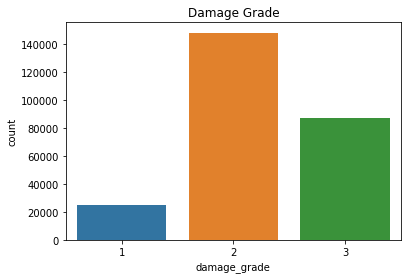

In [43]:
temp=train_test[train_test['damage_grade'] > 0]
fig=sb.countplot(temp['damage_grade'])
plt.title('Damage Grade')
plt.show(fig)
del temp

### OUTLIERS removal

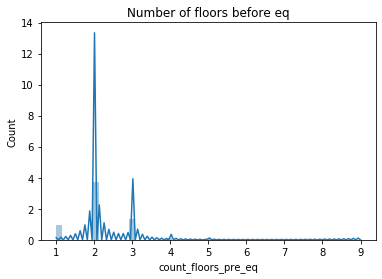

In [44]:
fig=sb.distplot(train_test['count_floors_pre_eq'])
plt.xlabel("count_floors_pre_eq")
plt.ylabel("Count")
plt.title("Number of floors before eq")
plt.show(fig)

In [45]:
train_test['count_floors_pre_eq'].describe()

count    347469.000000
mean          2.130579
std           0.727761
min           1.000000
25%           2.000000
50%           2.000000
75%           2.000000
max           9.000000
Name: count_floors_pre_eq, dtype: float64

In [46]:
train_test[(train_test['count_floors_pre_eq'] > 3)]['count_floors_pre_eq'].count()

10564

In [47]:
train_test.loc[(train_test['count_floors_pre_eq'] > 3), 'count_floors_pre_eq'] = 3

In [48]:
train_test['count_floors_pre_eq'].value_counts()

2    209029
3     84735
1     53705
Name: count_floors_pre_eq, dtype: int64

In [49]:
train_test['age'].describe()

count    347469.000000
mean         26.538814
std          73.527749
min           0.000000
25%          10.000000
50%          15.000000
75%          30.000000
max         995.000000
Name: age, dtype: float64

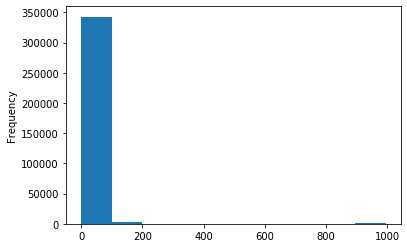

In [50]:
train_test['age'].plot(kind = 'hist')

In [51]:
rm_IQR_outliers(train_test, 'age')

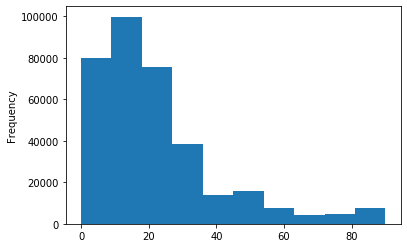

In [52]:
train_test['age'].plot(kind = 'hist')

In [53]:
train_test['area_percentage'].describe()

count    347469.000000
mean          8.017014
std           4.388646
min           1.000000
25%           5.000000
50%           7.000000
75%           9.000000
max         100.000000
Name: area_percentage, dtype: float64

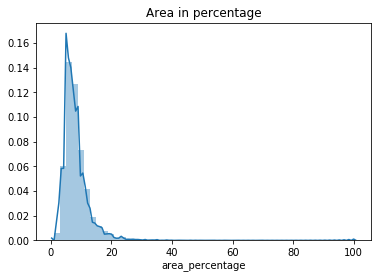

In [54]:
fig=sb.distplot(train_test['area_percentage'])
plt.title('Area in percentage')
plt.show(fig)

In [55]:
train_test[(train_test['area_percentage'] > 50)]['area_percentage'].count()

223

In [56]:
rm_IQR_outliers(train_test, 'area_percentage')

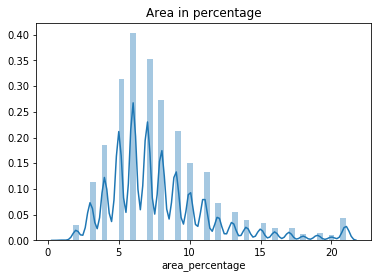

In [57]:
fig=sb.distplot(train_test['area_percentage'])
plt.title('Area in percentage')
plt.show(fig)

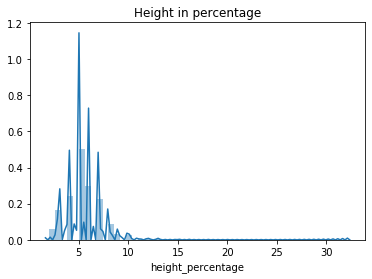

In [58]:
fig=sb.distplot(train_test['height_percentage'])
plt.title('Height in percentage')
plt.show(fig)

In [59]:
train_test['height_percentage'].describe()

count    347469.000000
mean          5.434799
std           1.915555
min           2.000000
25%           4.000000
50%           5.000000
75%           6.000000
max          32.000000
Name: height_percentage, dtype: float64

In [60]:
rm_IQR_outliers(train_test, 'height_percentage')

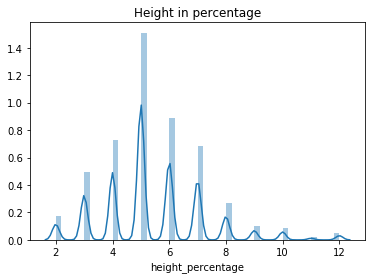

In [61]:
fig=sb.distplot(train_test['height_percentage'])
plt.title('Height in percentage')
plt.show(fig)

In [62]:
train_test['land_surface_condition'].value_counts()

t    288937
n     47413
o     11119
Name: land_surface_condition, dtype: int64

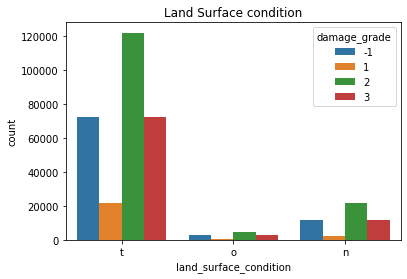

In [63]:
fig=sb.countplot(x='land_surface_condition', hue='damage_grade', data=train_test)
plt.title('Land Surface condition')
plt.show(fig)

In [64]:
train_test['foundation_type'].value_counts()

r    292374
w     20048
u     18908
i     14182
h      1957
Name: foundation_type, dtype: int64

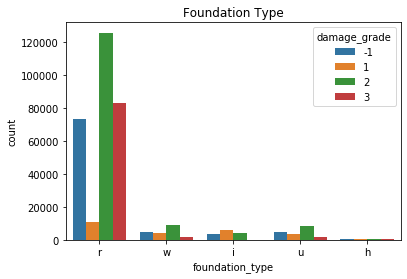

In [65]:
fig = sb.countplot(x='foundation_type', hue='damage_grade', data=train_test)
plt.title('Foundation Type')
plt.show(fig)

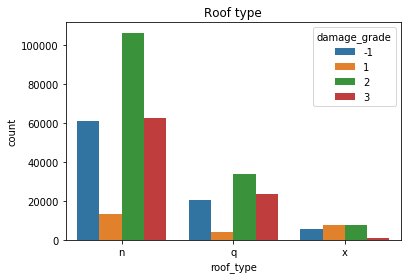

In [66]:
fig = sb.countplot(x='roof_type', hue='damage_grade', data=train_test)
plt.title('Roof type')
plt.show(fig)

In [67]:
pd.crosstab(train_test['land_surface_condition'], train_test['damage_grade'], normalize = 'index')

damage_grade,-1,1,2,3
land_surface_condition,,,,
n,0.250670,0.053909,0.453125,0.242296
o,0.252091,0.054142,0.423419,0.270348
t,0.249812,0.076023,0.422469,0.251695


In [68]:
pd.crosstab(train_test['roof_type'], train_test['damage_grade'], normalize = 'index')

damage_grade,-1,1,2,3
roof_type,,,,
n,0.250571,0.055526,0.436303,0.257600
q,0.248202,0.047934,0.415225,0.288639
x,0.250405,0.354393,0.361434,0.033767


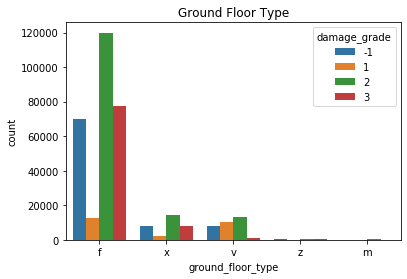

In [69]:
fig = sb.countplot(x='ground_floor_type', hue='damage_grade', data=train_test)
plt.title('Ground Floor Type')
plt.show(fig)

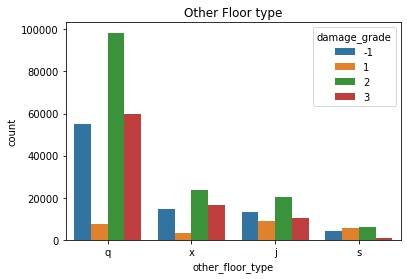

In [70]:
fig = sb.countplot(x='other_floor_type', hue='damage_grade', data=train_test)
plt.title('Other Floor type')
plt.show(fig)

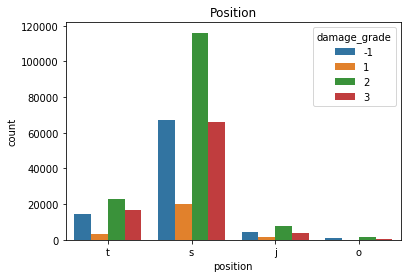

In [71]:
fig = sb.countplot(x='position', hue='damage_grade', data=train_test)
plt.title('Position')
plt.show(fig)

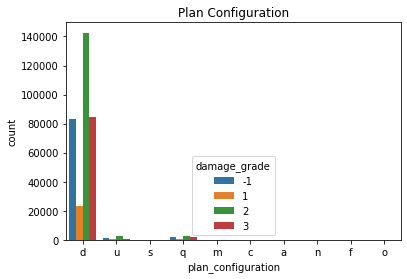

In [72]:
fig = sb.countplot(x='plan_configuration', hue='damage_grade', data=train_test)
plt.title('Plan Configuration')
plt.show(fig)

In [73]:
train_test.iloc[:, 7:14].tail(100)

,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position
347369,3.0,n,r,n,f,j,t
347370,4.0,t,r,n,f,q,s
347371,5.0,t,r,n,f,q,s
347372,7.0,t,r,q,f,q,s
347373,5.0,n,r,q,f,q,s
...,...,...,...,...,...,...,...
347464,6.0,t,r,q,f,q,t
347465,7.0,n,r,n,f,q,s
347466,3.0,t,r,n,f,j,s
347467,5.0,t,r,n,f,q,s


In [74]:
train_test.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
0,802906,6,487,12198,2,30.0,6.0,5.0,t,r,...,0,0,0,0,0,0,0,0,0,3
1,28830,8,900,2812,2,10.0,8.0,7.0,o,r,...,0,0,0,0,0,0,0,0,0,2
2,94947,21,363,8973,2,10.0,5.0,5.0,t,r,...,0,0,0,0,0,0,0,0,0,3
3,590882,22,418,10694,2,10.0,6.0,5.0,t,r,...,0,0,0,0,0,0,0,0,0,2
4,201944,11,131,1488,3,30.0,8.0,9.0,t,r,...,0,0,0,0,0,0,0,0,0,3


### The following feature values correspond to similar feature distribution in 85665 cases, meaning that a lot of buildings share the same characteristics.

In [75]:
train_test[(train_test['land_surface_condition'] == 't') &
            (train_test['foundation_type'] == 'r') &
            (train_test['roof_type'] == 'n') &
            (train_test['ground_floor_type'] == 'f') &
            (train_test['other_floor_type'] == 'q') &
            (train_test['position'] == 's') &
            (train_test['plan_configuration'] == 'd')].count()

building_id                               85665
geo_level_1_id                            85665
geo_level_2_id                            85665
geo_level_3_id                            85665
count_floors_pre_eq                       85665
age                                       85665
area_percentage                           85665
height_percentage                         85665
land_surface_condition                    85665
foundation_type                           85665
roof_type                                 85665
ground_floor_type                         85665
other_floor_type                          85665
position                                  85665
plan_configuration                        85665
has_superstructure_adobe_mud              85665
has_superstructure_mud_mortar_stone       85665
has_superstructure_stone_flag             85665
has_superstructure_cement_mortar_stone    85665
has_superstructure_mud_mortar_brick       85665
has_superstructure_cement_mortar_brick  

In [76]:
train_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 347469 entries, 0 to 347468
Data columns (total 39 columns):
building_id                               347469 non-null int64
geo_level_1_id                            347469 non-null int64
geo_level_2_id                            347469 non-null int64
geo_level_3_id                            347469 non-null int64
count_floors_pre_eq                       347469 non-null int64
age                                       347469 non-null float64
area_percentage                           347469 non-null float64
height_percentage                         347469 non-null float64
land_surface_condition                    347469 non-null object
foundation_type                           347469 non-null object
roof_type                                 347469 non-null object
ground_floor_type                         347469 non-null object
other_floor_type                          347469 non-null object
position                                  3474

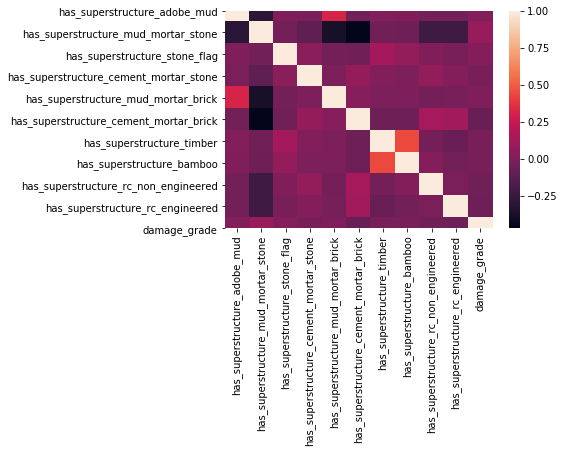

In [77]:
superstructureCol = []
for i in range(14,25):
    superstructureCol.append(train_test.columns[i])

corr = train_test[superstructureCol+['damage_grade']].corr()
sb.heatmap(corr)

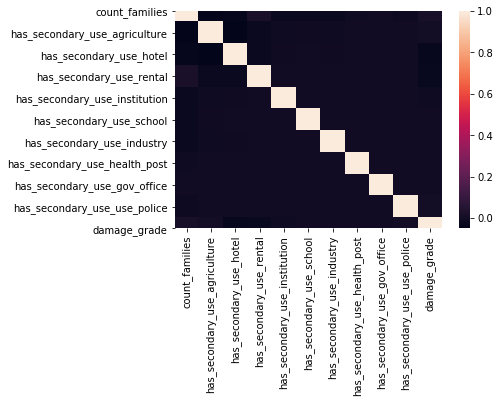

In [78]:
secondaryUse = []
for i in range(27,37):
    secondaryUse.append(train_test.columns[i])

corr = train_test[secondaryUse+['damage_grade']].corr()
sb.heatmap(corr)

In [79]:
train_test.iloc[:, 27:37].head()

,count_families,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police
0,1,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0


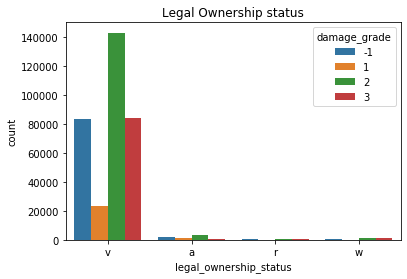

In [80]:
fig = sb.countplot(x='legal_ownership_status', hue = 'damage_grade', data = train_test)
plt.title("Legal Ownership status")
plt.show(fig)

In [81]:
train_test.iloc[:, 0:3].tail(10)

,building_id,geo_level_1_id,geo_level_2_id
347459,290842,17,1149
347460,330371,4,55
347461,698612,20,173
347462,445192,6,460
347463,640115,7,1166
347464,310028,4,605
347465,663567,10,1407
347466,1049160,22,1136
347467,442785,6,1041
347468,501372,26,36


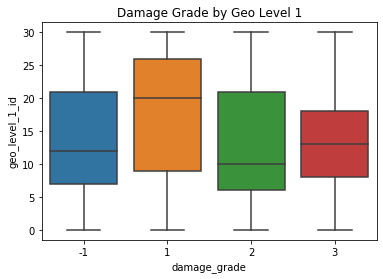

In [82]:
fig = sb.boxplot(x='damage_grade', y='geo_level_1_id', data=train_test)
plt.title('Damage Grade by Geo Level 1')
plt.show(fig)

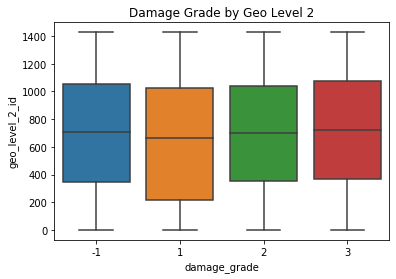

In [83]:
fig = sb.boxplot(x='damage_grade', y='geo_level_2_id', data=train_test)
plt.title('Damage Grade by Geo Level 2')
plt.show(fig)

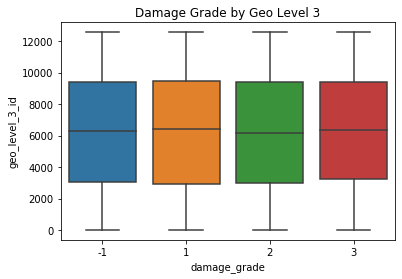

In [84]:
fig = sb.boxplot(x='damage_grade', y='geo_level_3_id', data=train_test)
plt.title('Damage Grade by Geo Level 3')
plt.show(fig)

In [85]:
train_test.iloc[:, 15:25].head()

,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered
0,1,1,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,1,1,0,0
4,1,0,0,0,0,0,0,0,0,0


### geo_level_<1,2,3>_id represents geographic regions and have have losts of possible values, conditional probabilities of Geographical Levels will be used as a feature engineering process, the code snipped was taken from
### ref.: https://medium.com/swlh/predicting-damage-to-building-due-to-earthquake-using-data-science-e85a62adc0c0

### Geo_level_1_id

In [86]:
damage1 = {}
damage2 = {}
damage3 = {}

for i,j in (train_test['geo_level_1_id'].value_counts()).iteritems():
    
    n1 = len(train_test[train_test['damage_grade']==1][train_test['geo_level_1_id']==i])
    n2 = len(train_test[train_test['damage_grade']==2][train_test['geo_level_1_id']==i])
    n3 = len(train_test[train_test['damage_grade']==3][train_test['geo_level_1_id']==i])

    damage1[i] = n1/j
    damage2[i] = n2/j
    damage3[i] = n3/j

In [87]:
list1 = []
list2 = []
list3 = []

for i in train_test['geo_level_1_id']:
    list1.append(damage1.get(i))
    list2.append(damage2.get(i))
    list3.append(damage3.get(i))

train_test['prob1_geo1'] = list1
train_test['prob2_geo1'] = list2
train_test['prob3_geo1'] = list3

### Geo_level_2_id

In [88]:
damage1 = {}
damage2 = {}
damage3 = {}

for i,j in (train_test['geo_level_2_id'].value_counts()).iteritems():
    
    n1 = len(train_test[train_test['damage_grade']==1][train_test['geo_level_2_id']==i])
    n2 = len(train_test[train_test['damage_grade']==2][train_test['geo_level_2_id']==i])
    n3 = len(train_test[train_test['damage_grade']==3][train_test['geo_level_2_id']==i])

    damage1[i] = n1/j
    damage2[i] = n2/j
    damage3[i] = n3/j

In [89]:
list1 = []
list2 = []
list3 = []

for i in train_test['geo_level_2_id']:
    list1.append(damage1.get(i))
    list2.append(damage2.get(i))
    list3.append(damage3.get(i))

train_test['prob1_geo2'] = list1
train_test['prob2_geo2'] = list2
train_test['prob3_geo2'] = list3

### Geo_level_3_id

In [90]:
damage1 = {}
damage2 = {}
damage3 = {}

for i,j in (train_test['geo_level_3_id'].value_counts()).iteritems():
    
    n1 = len(train_test[train_test['damage_grade']==1][train_test['geo_level_3_id']==i])
    n2 = len(train_test[train_test['damage_grade']==2][train_test['geo_level_3_id']==i])
    n3 = len(train_test[train_test['damage_grade']==3][train_test['geo_level_3_id']==i])

    damage1[i] = n1/j
    damage2[i] = n2/j
    damage3[i] = n3/j

In [91]:
list1 = []
list2 = []
list3 = []

for i in train_test['geo_level_3_id']:
    list1.append(damage1.get(i))
    list2.append(damage2.get(i))
    list3.append(damage3.get(i))

train_test['prob1_geo3'] = list1
train_test['prob2_geo3'] = list2
train_test['prob3_geo3'] = list3

In [92]:
train_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 347469 entries, 0 to 347468
Data columns (total 48 columns):
building_id                               347469 non-null int64
geo_level_1_id                            347469 non-null int64
geo_level_2_id                            347469 non-null int64
geo_level_3_id                            347469 non-null int64
count_floors_pre_eq                       347469 non-null int64
age                                       347469 non-null float64
area_percentage                           347469 non-null float64
height_percentage                         347469 non-null float64
land_surface_condition                    347469 non-null object
foundation_type                           347469 non-null object
roof_type                                 347469 non-null object
ground_floor_type                         347469 non-null object
other_floor_type                          347469 non-null object
position                                  3474

In [93]:
train_test['legal_ownership_status'].value_counts()

v    334633
a      7307
w      3539
r      1990
Name: legal_ownership_status, dtype: int64

In [94]:
train_test.shape

(347469, 48)

In [95]:
cat_columns = ['land_surface_condition', 'foundation_type', 'roof_type', 'ground_floor_type', 'other_floor_type', 'position', 'plan_configuration', 'legal_ownership_status']
train_test = pd.get_dummies(train_test, prefix_sep = '_', columns = cat_columns, drop_first=False)

In [96]:
train_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 347469 entries, 0 to 347468
Data columns (total 78 columns):
building_id                               347469 non-null int64
geo_level_1_id                            347469 non-null int64
geo_level_2_id                            347469 non-null int64
geo_level_3_id                            347469 non-null int64
count_floors_pre_eq                       347469 non-null int64
age                                       347469 non-null float64
area_percentage                           347469 non-null float64
height_percentage                         347469 non-null float64
has_superstructure_adobe_mud              347469 non-null int64
has_superstructure_mud_mortar_stone       347469 non-null int64
has_superstructure_stone_flag             347469 non-null int64
has_superstructure_cement_mortar_stone    347469 non-null int64
has_superstructure_mud_mortar_brick       347469 non-null int64
has_superstructure_cement_mortar_brick    347469 no

In [108]:
train_test['CntFloorAge'] = train_test['count_floors_pre_eq']/(train_test['age']+0.1)
train_test['CntFloorsArea'] = train_test['count_floors_pre_eq']/train_test['area_percentage']
train_test['CntFloorsHeight'] = train_test['count_floors_pre_eq']/train_test['height_percentage']
train_test['AreaPerAge'] = train_test['area_percentage']/(train_test['age']+0.1)
train_test['HeightPerAge'] = train_test['height_percentage']/(train_test['age']+0.1)
train_test['AreaPerHeight'] = train_test['area_percentage']/train_test['height_percentage']
train_test['CntFamFloors'] = train_test['count_families']/train_test['count_floors_pre_eq']
train_test['CntFamArea'] = train_test['count_families']/train_test['area_percentage']
train_test['CntFamHeight'] = train_test['count_families']/train_test['height_percentage']



In [111]:
train_test.tail()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,...,legal_ownership_status_w,CntFloorAge,CntFloorsArea,CntFloorsHeight,AreaPerAge,HeightPerAge,AreaPerHeight,CntFamFloors,CntFamArea,CntFamHeight
347464,310028,4,605,3623,3,70.0,20.0,6.0,0,1,...,1,0.042796,0.150000,0.500000,0.285307,0.085592,3.333333,0.333333,0.050000,0.166667
347465,663567,10,1407,11907,3,25.0,6.0,7.0,1,1,...,0,0.119522,0.500000,0.428571,0.239044,0.278884,0.857143,0.333333,0.166667,0.142857
347466,1049160,22,1136,7712,1,50.0,3.0,3.0,0,1,...,0,0.019960,0.333333,0.333333,0.059880,0.059880,1.000000,1.000000,0.333333,0.333333
347467,442785,6,1041,912,2,5.0,9.0,5.0,1,1,...,0,0.392157,0.222222,0.400000,1.764706,0.980392,1.800000,0.500000,0.111111,0.200000
347468,501372,26,36,6436,2,10.0,11.0,4.0,0,0,...,0,0.198020,0.181818,0.500000,1.089109,0.396040,2.750000,0.500000,0.090909,0.250000


In [112]:
train_val = train_test[(train_test['damage_grade'] != -1)]
test = train_test[(train_test['damage_grade'] == -1)]

In [113]:
train_val.tail()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,...,legal_ownership_status_w,CntFloorAge,CntFloorsArea,CntFloorsHeight,AreaPerAge,HeightPerAge,AreaPerHeight,CntFamFloors,CntFamArea,CntFamHeight
260596,688636,25,1335,1621,1,55.0,6.0,3.0,0,1,...,0,0.018149,0.166667,0.333333,0.108893,0.054446,2.000000,1.000000,0.166667,0.333333
260597,669485,17,715,2060,2,0.0,6.0,5.0,0,1,...,0,20.000000,0.333333,0.400000,60.000000,50.000000,1.200000,0.500000,0.166667,0.200000
260598,602512,17,51,8163,3,55.0,6.0,7.0,0,1,...,0,0.054446,0.500000,0.428571,0.108893,0.127042,0.857143,0.333333,0.166667,0.142857
260599,151409,26,39,1851,2,10.0,14.0,6.0,0,0,...,0,0.198020,0.142857,0.333333,1.386139,0.594059,2.333333,0.500000,0.071429,0.166667
260600,747594,21,9,9101,3,10.0,7.0,6.0,0,1,...,0,0.297030,0.428571,0.500000,0.693069,0.594059,1.166667,1.000000,0.428571,0.500000


In [114]:
del test['damage_grade']

In [115]:
train_val.to_csv('../input/train_val.csv', index=False)
test.to_csv('../input/test.csv', index=False)

In [116]:
train_val.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,...,legal_ownership_status_w,CntFloorAge,CntFloorsArea,CntFloorsHeight,AreaPerAge,HeightPerAge,AreaPerHeight,CntFamFloors,CntFamArea,CntFamHeight
0,802906,6,487,12198,2,30.0,6.0,5.0,1,1,...,0,0.066445,0.333333,0.400000,0.199336,0.166113,1.200000,0.500000,0.166667,0.200000
1,28830,8,900,2812,2,10.0,8.0,7.0,0,1,...,0,0.198020,0.250000,0.285714,0.792079,0.693069,1.142857,0.500000,0.125000,0.142857
2,94947,21,363,8973,2,10.0,5.0,5.0,0,1,...,0,0.198020,0.400000,0.400000,0.495050,0.495050,1.000000,0.500000,0.200000,0.200000
3,590882,22,418,10694,2,10.0,6.0,5.0,0,1,...,0,0.198020,0.333333,0.400000,0.594059,0.495050,1.200000,0.500000,0.166667,0.200000
4,201944,11,131,1488,3,30.0,8.0,9.0,1,0,...,0,0.099668,0.375000,0.333333,0.265781,0.299003,0.888889,0.333333,0.125000,0.111111
